Text(0, 0.5, 'Índice do neurônio')

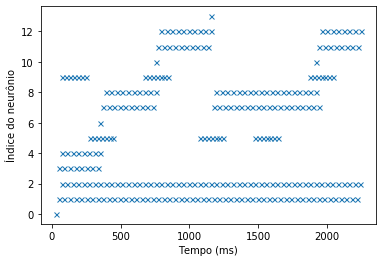

In [31]:
from brian2 import * 
%matplotlib inline

N = 14 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_AND = 4*mV # Peso sináptico excitatório da porta AND
                 # peso de 8mv para 1 entrada e clock. 4mV para 2 entradas e clock
w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')

#Criação da sinapse excitatória dos loops (clock e estados)
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # stimulus
syn_ex.connect(i=0, j=3) # stimulus

syn_ex.connect(i=1, j=2) # Clock
syn_ex.connect(i=2, j=1)

syn_ex.connect(i=3, j=4) # Estado Sa
syn_ex.connect(i=4, j=3)

syn_ex.connect(i=7, j=8) # Estado Sb
syn_ex.connect(i=8, j=7)

syn_ex.connect(i=11, j=12) # Estado Sc
syn_ex.connect(i=12, j=11)

syn_ex.connect(i=6, j=7) # Lógica AND
syn_ex.connect(i=10, j=11) # Lógica AND
syn_ex.connect(i=13, j=7) # Lógica AND

#Criação da sinapse excitatória da porta AND
syn_ex_AND = Synapses(neurons, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn)
syn_ex_AND.connect(i=1, j=6) # AND no neurônio 6
syn_ex_AND.connect(i=3, j=6)
syn_ex_AND.connect(i=5, j=6)

syn_ex_AND.connect(i=1, j=10) # AND no neurônio 10
syn_ex_AND.connect(i=7, j=10)
syn_ex_AND.connect(i=9, j=10)

syn_ex_AND.connect(i=1, j=13) # AND no neurônio 13
syn_ex_AND.connect(i=5, j=13)
syn_ex_AND.connect(i=11, j=13)

#Criação da sinapse inibitória
syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
syn_in.connect(i=6, j=3)
syn_in.connect(i=6, j=4)
syn_in.connect(i=10, j=7)
syn_in.connect(i=10, j=8)
syn_in.connect(i=13, j=11)
syn_in.connect(i=13, j=12)

#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

#Valores iniciais de tensão e corrente na entrada dos neurônios
neurons.v = -80*mV
neurons.I = [110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]*pA 
run (50*ms)  

neurons.I[0] = 0*pA
neurons.I[9] = 110*pA
run(200*ms)

neurons.I[9] = 0*pA
neurons.I[5] = 110*pA
run(200*ms)

neurons.I[5] = 0*pA
run(200*ms)

neurons.I[9] = 110*pA
run(200*ms)

neurons.I[9] = 0*pA
run(200*ms)

neurons.I[5] = 110*pA
run(200*ms)

neurons.I[5] = 0*pA
run(200*ms)

neurons.I[5] = 110*pA
run(200*ms)

neurons.I[5] = 0*pA
run(200*ms)

neurons.I[9] = 110*pA
run(200*ms)

neurons.I[9] = 0*pA
run(200*ms)

plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
